# Plotting with Pandas and Matplotlib - Solutions

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget -c https://raw.githubusercontent.com/aguinaldoabbj/minicourse_open_data_natal_2019/master/data/dados-be-2018-analitico.csv
#wget -c http://dados.natal.br/dataset/4fad551d-4d3b-4597-b8d3-7e887e22332e/resource/0d4a0f0f-b8a5-46a0-acfe-bb9138c8eb9e/download/dados-be-2019-analitico.csv
!ls -lah  dados-be*

--2019-04-26 20:42:54--  https://raw.githubusercontent.com/aguinaldoabbj/minicourse_open_data_natal_2019/master/data/dados-be-2018-analitico.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72991 (71K) [text/plain]
Saving to: ‘dados-be-2018-analitico.csv’

dados-be-2018-anali 100%[===================>]  71.28K  --.-KB/s    in 0.02s   

2019-04-26 20:42:54 (4.46 MB/s) - ‘dados-be-2018-analitico.csv’ saved [72991/72991]

-rw-r--r-- 1 root root 72K Apr 26 20:42 dados-be-2018-analitico.csv


In [0]:
# CSV file uses ';' as separator and is encodded in iso-8859-1
df = pd.read_csv("dados-be-2018-analitico.csv", encoding='iso-8859-1', sep=';', thousands=r'.')

##     Line plots

#### Exercise

![alt text](https://cdn.dribbble.com/users/2344801/screenshots/4774578/alphatestersanimation2.gif =150x120)

1. Improve the line plot of the previous exercise.
  - Set the x-axis label to *"Mês"*.
  - Set the y-axis label to *"N° de passagens"*.
  - Set the plot title to *"Variação mensal de passagens no cartão estudantil"*.
  - Display the plot.

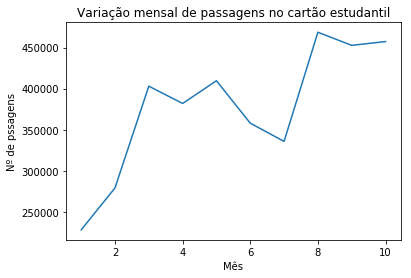

In [7]:
guanabara = df[df['Empresa'] == 'GUANABARA - URB']

guanabara_by_month = guanabara.groupby('Mês', as_index=False).sum()

plt.plot(guanabara_by_month["Mês"], guanabara_by_month["Estudante_Cartao"])

plt.xlabel('Mês')
plt.ylabel("Nº de pssagens")
plt.title("Variação mensal de passagens no cartão estudantil")
plt.show()

#### Exercise

![alt text](https://cdn.dribbble.com/users/2344801/screenshots/4774578/alphatestersanimation2.gif =150x120)

1. Try to generate separeted subplots of the previous example passing *subplots=True* argument to *plot*.

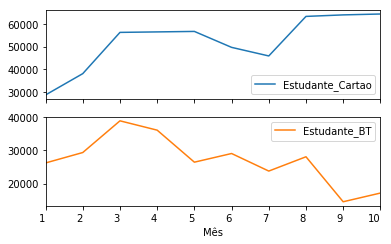

In [18]:
df.groupby(['Mês'])[['Estudante_Cartao', 'Estudante_BT']].max().plot(subplots=True, rot=0)
plt.show()

## Bar Plots

#### Exercise

![alt text](https://cdn.dribbble.com/users/2344801/screenshots/4774578/alphatestersanimation2.gif =150x120)

1. Try to generate a horizontal bar plot of **new_df** using *barh()* method.

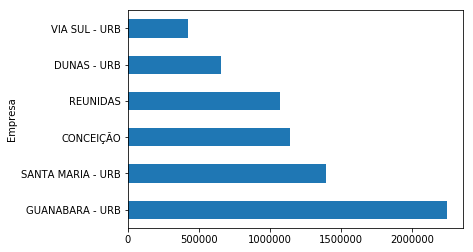

In [11]:
new_df = df.groupby(['Empresa']).sum()
new_df['Gratuito_Cartao'].sort_values(ascending=False).plot.barh()
plt.show()

#### Exercise

![alt text](https://cdn.dribbble.com/users/2344801/screenshots/4774578/alphatestersanimation2.gif =150x120)

1. Try to create the stacked plot of the previous chart passing the *stacked=True* argument



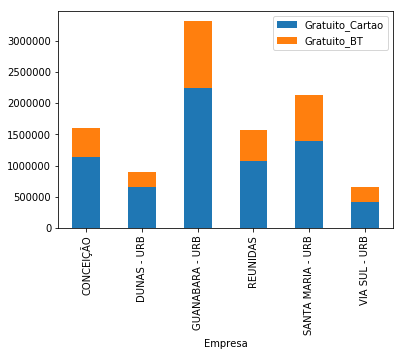

In [12]:
# Plot using in plot attribute
new_df[['Gratuito_Cartao', 'Gratuito_BT']].plot.bar(stacked=True)
plt.show()

## Pie Plots

#### Exercise

![alt text](https://cdn.dribbble.com/users/2344801/screenshots/4774578/alphatestersanimation2.gif =150x120)

1. Plot a pie chart comparing the ticket 'Inteira_Especie' of all companies. The percentages must have two decimal places.



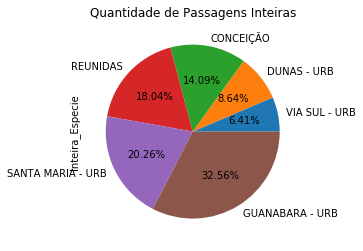

In [28]:
df.groupby(['Empresa'])['Inteira_Especie'].sum().sort_values().plot.pie(autopct='%.2f%%', title='Quantidade de Passagens Inteiras')
plt.show()

## Box plots

#### Exercise

![alt text](https://cdn.dribbble.com/users/2344801/screenshots/4774578/alphatestersanimation2.gif =150x120)

1. Create a boxplot to the variables 'Gratuito_Cartao' e 'Gratuito_BT'.


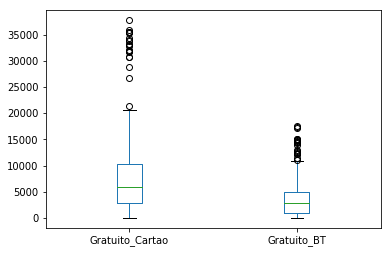

In [29]:
df[['Gratuito_Cartao', 'Gratuito_BT']].plot.box()
plt.show()

## Hexagonal bin plots


#### Exercise

![alt text](https://cdn.dribbble.com/users/2344801/screenshots/4774578/alphatestersanimation2.gif =150x120)

1. Try to create the hexagonal plot of the scatter plot chart created previously.
  - Use the method *hexbin()* method passing *"Integracao_Plena"* as *x*, *"Qtd_Viagens"* as *y* and the parameter *gridsize=15*
  - Display the plot.


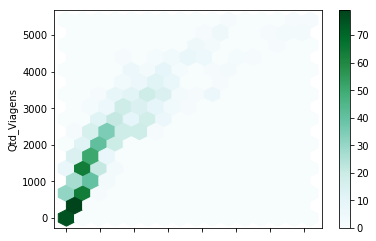

In [15]:
df.plot.hexbin(x='Integracao_Plena', y='Qtd_Viagens', gridsize=15)
plt.show()

## Area plots

#### Exercise

![alt text](https://cdn.dribbble.com/users/2344801/screenshots/4774578/alphatestersanimation2.gif =150x120)

1. Create a area plot to the variables 'Inteira_Cartao' e 'Inteira_Especie' where the column 'Mês' is the x-axis. Use the *groupby()* and *sum()* methods.


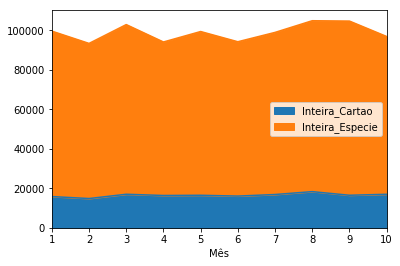

In [17]:
df.groupby(['Mês'])[['Inteira_Cartao', 'Inteira_Especie']].max().plot.area()
plt.show()

## Histograms and density plots

#### Exercise

![alt text](https://cdn.dribbble.com/users/2344801/screenshots/4774578/alphatestersanimation2.gif =150x120)

1. Create a histogram and a density plot to the "Tarifa_Social" column.
  - Create a histogram plot  to "Tarifa_Social" and assign the result to variable **axis**.
  - Generate a density plot to the same column using *kde()* method, passing *ax=axis* and *secondary_y=True* as arguments.
  - Display the plot.

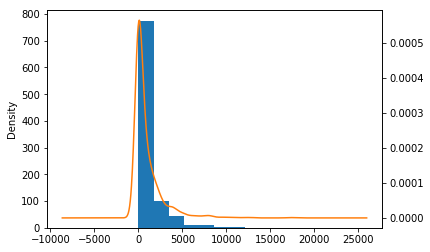

In [0]:
ax = df['Tarifa_Social'].plot.hist()
df['Tarifa_Social'].plot.kde(ax=ax, secondary_y=True)
plt.show()